 ## Guía de Trabajos Prácticos 1

# **Librerías**

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import sys

print("Python version %s / OpenCV version %s " %(sys.version,cv.__version__))

Python version 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0] / OpenCV version 4.8.0 


Activo mi entorno GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Ejercicio 1:** Filtros pasa-bajos
1. Genere diferentes máscaras de promediado, utilizando filtro de promediado o
caja (box filter) y el formato cruz.
Aplique los filtros sobre una imagen y verifique los efectos de aumentar el
tamaño de la máscara en la imagen resultante.
Ayuda: mask = np.ones((3,3),np.float32)/9

<Figure size 640x480 with 0 Axes>

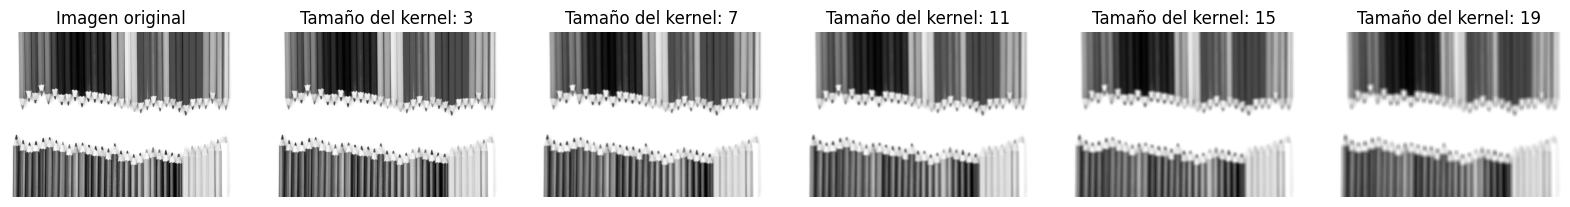

In [ ]:
# Carga de imagen:
entry = cv.imread("/content/drive/My Drive/PDI/lapices02.jpg",cv.IMREAD_GRAYSCALE)

# Parametros del filtro
mask_size = 3 # Inicialmente siempre debería ser impar
increment = 4 # Incremento de a pares para que siempre tenga kernels impar x impar
samples = 5

# Muestra de imagen original
plt.figure(1)
plt.figure(figsize=(samples*4, 4))
plt.subplot(1, samples+1, 1)
plt.imshow(entry, cmap='gray')
plt.axis('off')
plt.title("Imagen original")

# Bucle para variar el filtro
for i in range(samples):
    mask = (mask_size, mask_size)
    rslt = cv.boxFilter(entry, -1, mask)

    # Muestra de imagen filtrada
    plt.subplot(1, samples+1, i+2)
    plt.imshow(rslt, cmap='gray')
    plt.title(f"Tamaño del kernel: {mask_size}")
    plt.axis('off')

    # Incremento para proxima iteracion
    mask_size += increment

2. Genere máscaras de filtrado gaussianas con diferente σ y diferente tamaño.
Visualice y aplique las máscaras sobre una imagen. Compare los resultados
con los de un filtro de promediado del mismo tamaño.

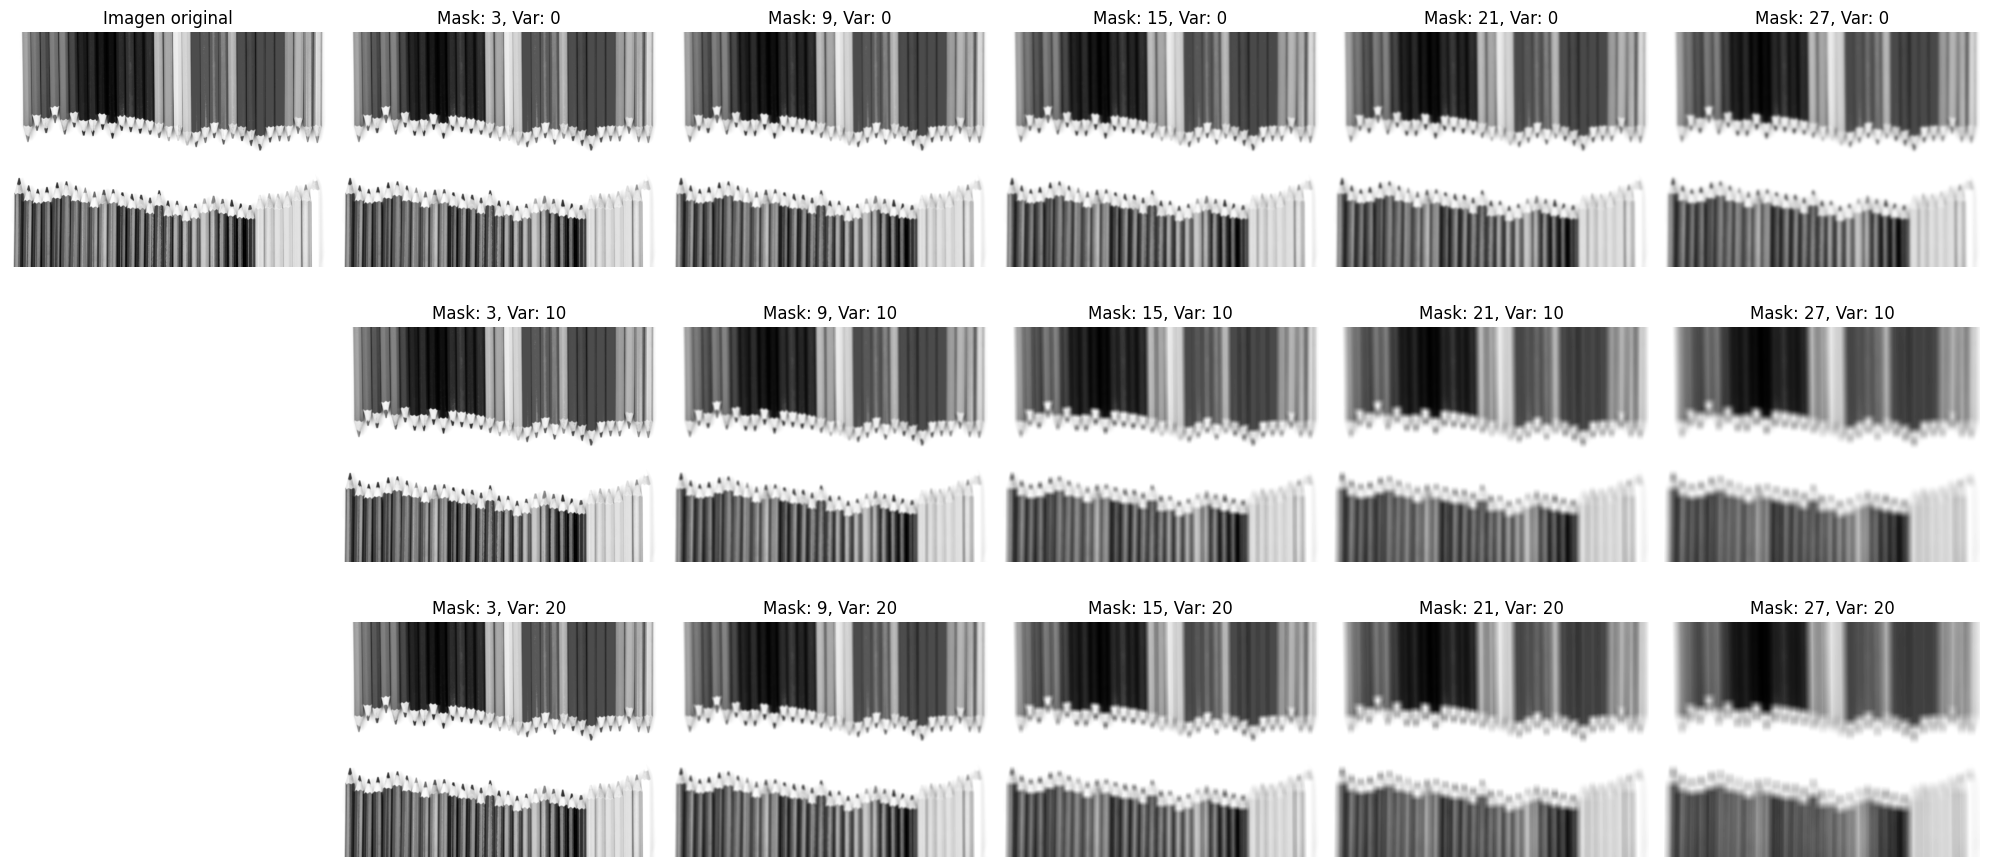

In [ ]:
# Carga de imagen:
entry = cv.imread("/content/drive/My Drive/PDI/lapices02.jpg", cv.IMREAD_GRAYSCALE)

# Parámetros del filtro
mask_size = 3       # Inicialmente siempre debería ser impar
increment_mask = 6  # Siempre debe ser par para que mask_size permanezca impar
samples_mask = 5
base_variance = 0
increment_variance = 10
samples_variance = 3

# Muestra de imagen original
plt.figure(figsize=(samples_mask * 4, samples_variance * 4))
plt.subplot(samples_variance + 1, samples_mask + 1, 1)
plt.imshow(entry, cmap='gray')
plt.axis('off')
plt.title("Imagen original")

# Bucle para variar el tamaño del filtro y la varianza
for i in range(samples_mask):
    mask = (mask_size, mask_size)
    variance = base_variance
    for j in range(samples_variance):
        rslt = cv.GaussianBlur(entry, mask, variance)

        # Muestra de imagen filtrada
        plt.subplot(samples_variance + 1, samples_mask + 1, j * (samples_mask + 1) + i + 2)
        plt.imshow(rslt, cmap='gray')
        plt.title(f"Mask: {mask_size}, Var: {variance}")
        plt.axis('off')

        variance += increment_variance  # Incrementamos la varianza para la siguiente iteración de varianza

    mask_size += increment_mask  # Incremento para la próxima iteración de tamaño de máscara

plt.tight_layout()
plt.show()

3. Utilice el filtro de mediana sobre una imagen con diferentes tamaños de ventana. Compare los resultados con los filtros anteriores para un mismo tamaño.

<Figure size 640x480 with 0 Axes>

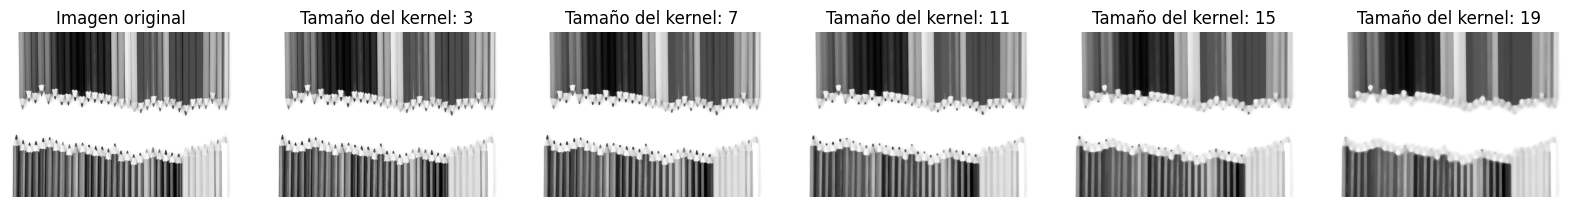

In [ ]:
# Carga de imagen:
entry = cv.imread("/content/drive/My Drive/PDI/lapices02.jpg",cv.IMREAD_GRAYSCALE)

# Parametros del filtro
mask_size = 3 # Inicialmente siempre debería ser impar
increment = 4
samples = 5

# Muestra de imagen original
plt.figure(1)
plt.figure(figsize=(samples*4, 4))
plt.subplot(1, samples+1, 1)
plt.imshow(entry, cmap='gray')
plt.axis('off')
plt.title("Imagen original")

# Bucle para variar el filtro
for i in range(samples):
    mask = (mask_size, mask_size)
    rslt = cv.medianBlur(entry, mask_size)
    # Muestra de imagen filtrada
    plt.subplot(1, samples+1, i+2)
    plt.imshow(rslt, cmap='gray')
    plt.title(f"Tamaño del kernel: {mask_size}")
    plt.axis('off')

    # Incremento para proxima iteracion
    mask_size += increment

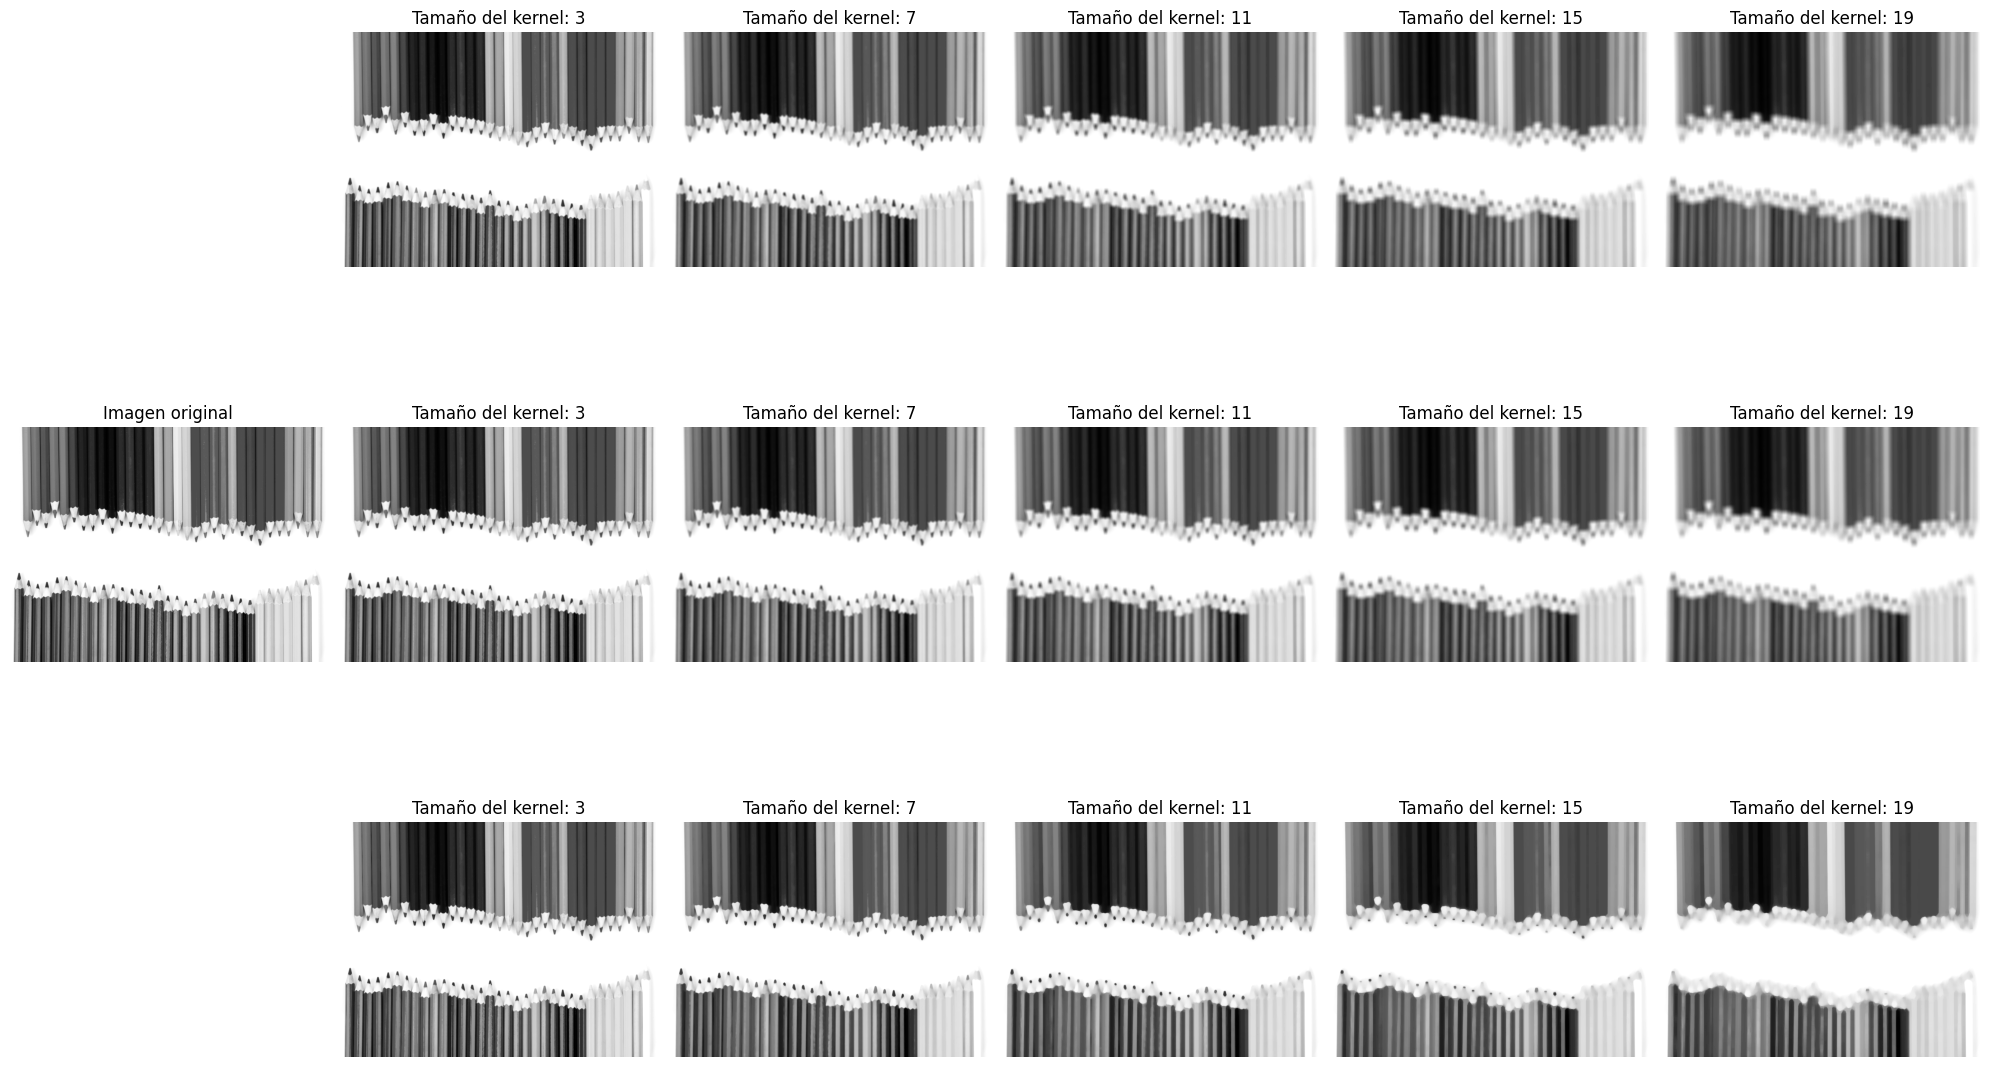

In [ ]:
# Carga de imagen:
entry = cv.imread("/content/drive/My Drive/PDI/lapices02.jpg", cv.IMREAD_GRAYSCALE)

# Parametros del filtro
mask_size = 3  # Inicialmente siempre debería ser impar
increment = 4
samples = 5
variance = 10

# Muestra de imagen original
plt.figure(figsize=(samples * 4, 12))
plt.subplot(1, samples + 1, 1)
plt.imshow(entry, cmap='gray')
plt.axis('off')
plt.title("Imagen original")

# Bucle para variar el filtro
for i in range(samples):
    mask = (mask_size, mask_size)

    # Filtro de caja
    rslt_box = cv.boxFilter(entry, -1, mask)
    plt.subplot(3, samples + 1, i + 2)
    plt.imshow(rslt_box, cmap='gray')
    plt.title(f"Tamaño del kernel: {mask_size}")
    plt.axis('off')

    # Filtro Gaussiano
    rslt_gaussian = cv.GaussianBlur(entry, mask, variance)
    plt.subplot(3, samples + 1, i + 2 + samples + 1)
    plt.imshow(rslt_gaussian, cmap='gray')
    plt.title(f"Tamaño del kernel: {mask_size}")
    plt.axis('off')

    # Filtro de mediana
    rslt_median = cv.medianBlur(entry, mask_size)
    plt.subplot(3, samples + 1, i + 2 + 2 * (samples + 1))
    plt.imshow(rslt_median, cmap='gray')
    plt.title(f"Tamaño del kernel: {mask_size}")
    plt.axis('off')

    # Incremento para próxima iteración
    mask_size += increment

plt.tight_layout()
plt.show()


4. Los filtros pasa-bajos pueden utilizarse para localizar objetos grandes en una escena. Aplique este concepto a la imagen 'hubble.tif' y obtenga una imagen de grises cuyos objetos correspondan solamente a los de mayor tamaño
de la original.

In [ ]:
# Función general:
def LUT(a, c, r=[0,256]):         # por default de 0 a 255, si le paso parámetro hace en un tramo específico
    r = np.arange(r[0],r[1],1)    # arma vector con paso 1 para aplicar TL punto a punto
    s = np.multiply(r,a) + c      # TL

    # para que no se vaya del rango:
    s = np.where(s>255,255,s)   # mayor que 255: 255
    s = np.where(s<0,0,s)       # menor que 0: 0
    return s


<Figure size 640x480 with 0 Axes>

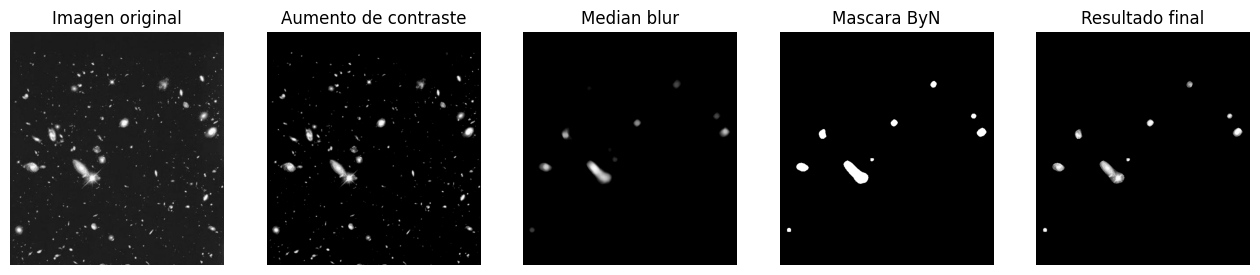

In [ ]:
# Carga de imagen:
entry = cv.imread("/content/drive/My Drive/PDI/hubble.tif",cv.IMREAD_GRAYSCALE)

# Se aumenta el contraste
par = [1,-50] # PARÁMETROS
mapeo = LUT(par[0],par[1])
contraste = mapeo[entry[:]]
# Asegurarse de que la salida en contraste sea uint8
contraste = cv.convertScaleAbs(contraste)

mask_size = 21  # Varía según cual sea el tamaño de interés
rslt_median = cv.medianBlur(contraste, mask_size)

# Aplicar umbral para crear la máscara
umbral = 23
_, mascara = cv.threshold(rslt_median, umbral, 255, cv.THRESH_BINARY)
salida_final = entry * (mascara/255);

plt.figure(1)
plt.figure(figsize=(16, 4))
plt.subplot(1, 5, 1)
plt.imshow(entry, cmap='gray')
plt.title("Imagen original")
plt.axis('off')
plt.subplot(1, 5, 2)
plt.imshow(contraste, cmap='gray')
plt.title("Aumento de contraste")
plt.axis('off')
plt.subplot(1, 5, 3)
plt.imshow(rslt_median, cmap='gray')
plt.title("Median blur")
plt.axis('off')
plt.subplot(1, 5, 4)
plt.imshow(mascara, cmap='gray')
plt.title("Mascara ByN")
plt.axis('off')
plt.subplot(1, 5, 5)
plt.imshow(salida_final, cmap='gray')
plt.title("Resultado final")
plt.axis('off')
plt.show()

## **Ejercicio 2:** Filtros pasa-altos

1. Defina máscaras de filtrado pasa-altos cuyos coeficientes sumen 1 y aplíquelas sobre diferentes imágenes. Interprete los resultados.

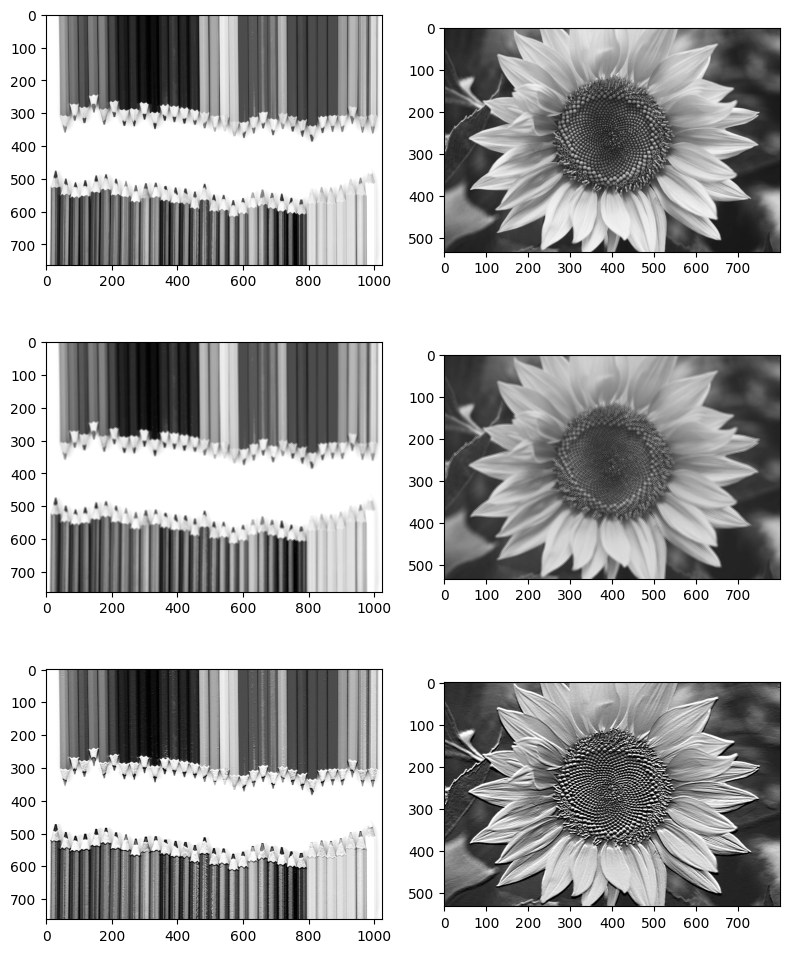

In [ ]:
# Cargamos las imágenes
img1 = cv.imread("/content/drive/My Drive/PDI/lapices02.jpg", cv.IMREAD_GRAYSCALE)
img2 = cv.imread("/content/drive/My Drive/PDI/flores02.jpg", cv.IMREAD_GRAYSCALE)

# Definimos máscaras de los filtros:
mask1 = np.array([[0, 1, 0],
                  [1, -3, 1],   # 1 + 1 + 1 + 1 - 3 = 1
                  [0, 1, 0]])
mask2 = np.array([[-1, -2, -1],
                  [0, 1, 0],    # 1 - 1 - 2 - 1 + 1 + 2 + 1 = 1
                  [1, 2, 1]])

# Aplicamos máscaras a ambas imágenes
img1_mask1 = cv.filter2D(img1, -1, mask1)
img1_mask2 = cv.filter2D(img1, -1, mask2)
img2_mask1 = cv.filter2D(img2, -1, mask1)
img2_mask2 = cv.filter2D(img2, -1, mask2)

# Mostramos resultados:
fig,ax = plt.subplots(3,2,figsize=(8,10))
ax[0,0].imshow(img1, cmap='gray')
ax[1,0].imshow(img1_mask1, cmap='gray')
ax[2,0].imshow(img1_mask2, cmap='gray')
ax[0,1].imshow(img2, cmap='gray')
ax[1,1].imshow(img2_mask1, cmap='gray')
ax[2,1].imshow(img2_mask2, cmap='gray')

plt.tight_layout()
plt.show()

> Mantiene las bajas frecuencias pero resalta las altas frecuencias. En las transiciones queda un efecto menos borroso, ocmo pinceladas.

2. Repita el ejercicio anterior para máscaras cuyos coeficientes sumen 0. Compare los resultados con los del punto anterior.

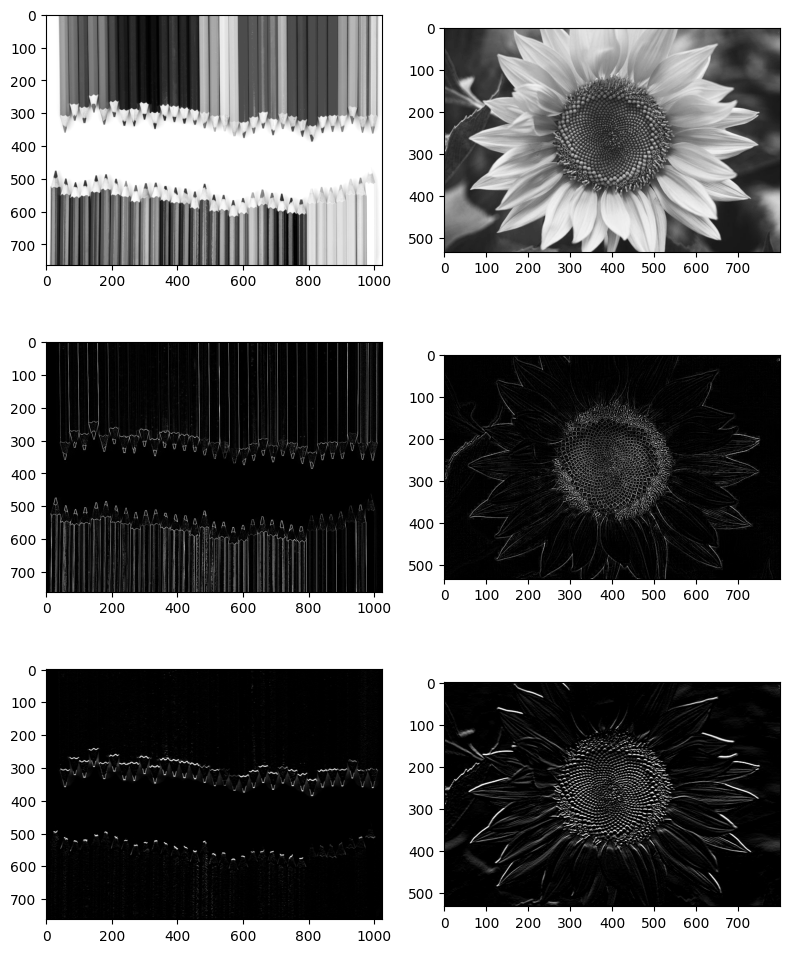

In [ ]:
# Con las imágenes del inciso anterior.

# Definimos máscaras de los filtros:
mask1 = np.array([[1, 1, 1],
                  [1, -8, 1],
                  [1, 1, 1]])
mask2 = np.array([[-1, -2, -1],
                  [0, 0, 0],
                  [1, 2, 1]])

# Aplicamos máscaras a ambas imágenes
img1_mask1 = cv.filter2D(img1, -1, mask1)
img1_mask2 = cv.filter2D(img1, -1, mask2)
img2_mask1 = cv.filter2D(img2, -1, mask1)
img2_mask2 = cv.filter2D(img2, -1, mask2)

# Mostramos resultados:
fig,ax = plt.subplots(3,2,figsize=(8,10))
ax[0,0].imshow(img1, cmap='gray')
ax[1,0].imshow(img1_mask1, cmap='gray')
ax[2,0].imshow(img1_mask2, cmap='gray')
ax[0,1].imshow(img2, cmap='gray')
ax[1,1].imshow(img2_mask1, cmap='gray')
ax[2,1].imshow(img2_mask2, cmap='gray')

plt.tight_layout()
plt.show()

> En este caso se resaltan las altas frecuencias

## **Ejercicio 3:** Filtros de acentuado

1. Obtenga versiones mejoradas de diferentes imágenes mediante el filtrado por
máscara difusa. Implemente el cálculo como g(x, y) = f(x, y) − PB(f(x, y))


In [ ]:
def mascara_difusa(img, kernel_size=(3, 3), sigma=1, alpha=1):
  img_suavizada = cv.GaussianBlur(img, kernel_size, sigma)  # obtengo PB(f(x,y))
  img_mascara = alpha*img - img_suavizada
  return img_mascara

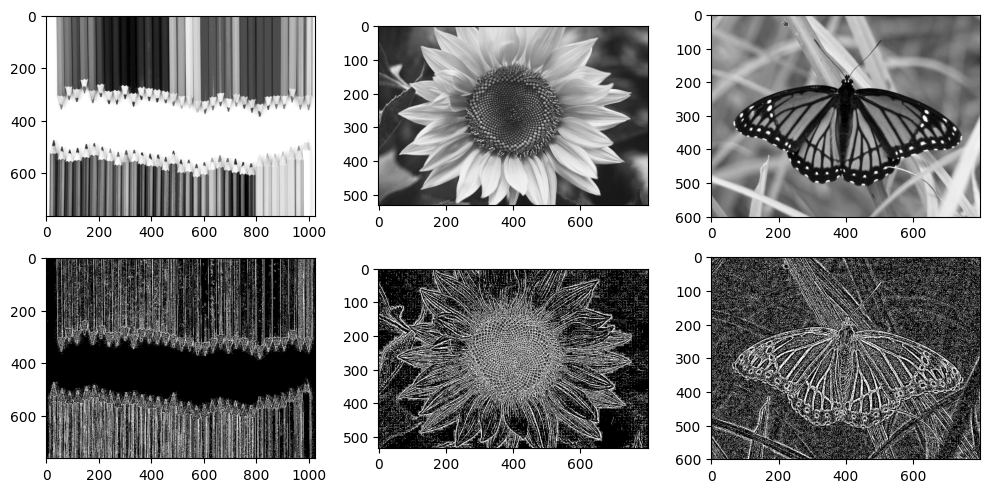

In [ ]:
# Cargamos las imágenes
img1 = cv.imread("/content/drive/My Drive/PDI/lapices02.jpg", cv.IMREAD_GRAYSCALE)
img2 = cv.imread("/content/drive/My Drive/PDI/flores02.jpg", cv.IMREAD_GRAYSCALE)
img3 = cv.imread("/content/drive/My Drive/PDI/mariposa02.png", cv.IMREAD_GRAYSCALE)

img1_mask = mascara_difusa(img1)
img2_mask = mascara_difusa(img2)
img3_mask = mascara_difusa(img3)

# Mostramos resultados:
fig,ax = plt.subplots(2,3,figsize=(10,5))
ax[0,0].imshow(img1, cmap='gray')
ax[1,0].imshow(img1_mask, cmap='gray')
ax[0,1].imshow(img2, cmap='gray')
ax[1,1].imshow(img2_mask, cmap='gray')
ax[0,2].imshow(img3, cmap='gray')
ax[1,2].imshow(img3_mask, cmap='gray')

plt.tight_layout()
plt.show()

> Vemos que para alpha = 1 la imagen empeora, en el siguiente ejercicio exploramos distintos valores de alpha.

2. Una forma de enfatizar las altas frecuencias sin perder los detalles de bajas
frecuencias es el filtrado de alta potencia. Implemente este procesamiento como la operación aritmética:
g(x, y) = Af(x, y) − PB(f(x, y)), con A ≥ 1.

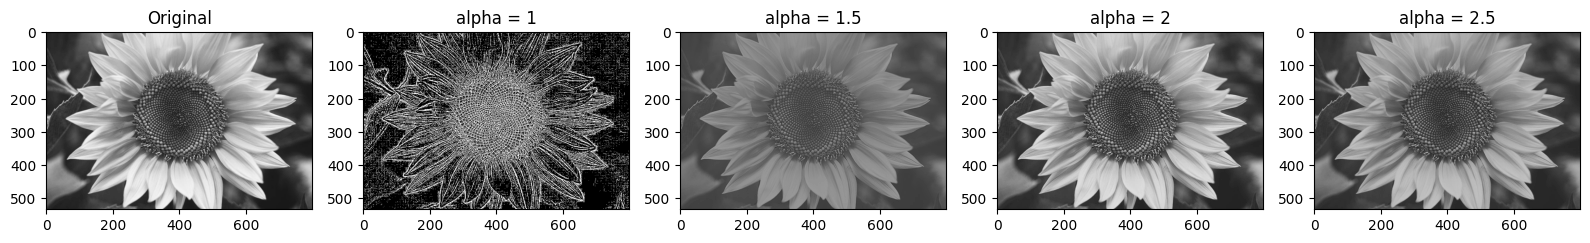

In [ ]:
# Parámetros a cambiar:
imagen_test = img2      # puedo cambiar a img1 para lápices, img2 para flor o img3 para mariposa
alphas = [1, 1.5, 2, 2.5]   # pongo cuatro valore de alpha que quiero probar

# Calculo máscaras difusas
img_mask2 = mascara_difusa(imagen_test,alpha=alphas[0])
img_mask3 = mascara_difusa(imagen_test,alpha=alphas[1])
img_mask4 = mascara_difusa(imagen_test,alpha=alphas[2])
img_mask5 = mascara_difusa(imagen_test,alpha=alphas[3])

# Mostramos resultados:
fig,ax = plt.subplots(1,5,figsize=(16,4))
ax[0].imshow(img2, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(img_mask2, cmap='gray')
ax[1].set_title(f"alpha = {alphas[0]}")
ax[2].imshow(img_mask3, cmap='gray')
ax[2].set_title(f"alpha = {alphas[1]}")
ax[3].imshow(img_mask4, cmap='gray')
ax[3].set_title(f"alpha = {alphas[2]}")
ax[4].imshow(img_mask5, cmap='gray')
ax[4].set_title(f"alpha = {alphas[3]}")

plt.tight_layout()
plt.show()

> El alpha con mejor desempeño es alpha = 2.

## **Ejercicio 4:** Trabajos de aplicación

1. Proponga una combinación de técnicas para realzar los detalles de la imagen
esqueleto.tif. Recuerde que esta tarea es subjetiva y depende de que pretende realzar. Justifique cada una de las elecciones en la elaboración de su propuesta.

> Primero observamos la imágen para analizar en detalle con qué estamos trabajando.

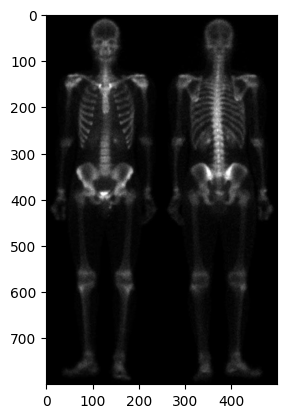

In [ ]:
esqueleto = cv.imread("/content/drive/My Drive/PDI/esqueleto.tif", cv.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(esqueleto, cmap='gray')
plt.show()

> Primero utilizamos transformaciones para realzar la imágen, probamos con logaritmica y exponencial para ver cómo funciona cada una.

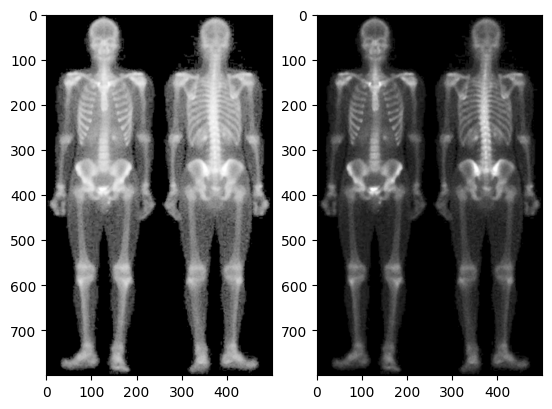

In [ ]:
#  FUNCIONES DE LA GUÍA ANTERIOR:
def t_log():
  r = np.arange(256)
  s = np.log10(1+r)
  return s

def t_pow(gamma):
    r = np.arange(256)/255.0
    s = pow(r,gamma)
    return s*255.0

mapeo_log = t_log()
mapeo_exp = t_pow(gamma=0.5)  # probamos con distintos valores de gamma

esqueleto_log = esqueleto.copy()
esqueleto_exp = esqueleto.copy()

esqueleto_log = mapeo_log[esqueleto[:]]
esqueleto_exp = mapeo_exp[esqueleto[:]]

fig,ax = plt.subplots(1,2)
ax[0].imshow(esqueleto_log,cmap='gray')
ax[1].imshow(esqueleto_exp,cmap='gray')
plt.show()

> La transformación exponencial con gamma entre 0.5 y 0.7 resalta los detalles sin ser muy oscuro ni saturar mucho. Adicionalmente, a esta imágen le queremos realzar las altas frecuencias por lo que aplicamos un filtro de acentuado: máscara difusa.

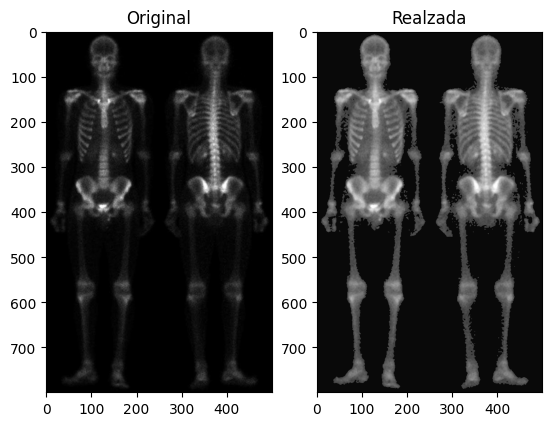

In [ ]:
# Nos podemos deshacer de la silueta de la persona (para quedarnos solo con el esqueleto) umbralizando y aplicando como máscara
esqueleto_umbral = cv.threshold(esqueleto_exp, 55, 255, cv.THRESH_BINARY)[1]   # probamos con distintos límites inferiores para descartar lo que no queremos y mantener lo que sí
                                                                               # con 60 perdemos definición de los huesos y con 40 vemos mucho ruido de la silueta de la persona
                                                                               # encontramos un punto decente de corte en 55, pero un buen corte podría variar entre 50 y 58 aprox.
esqueleto_umbral = np.uint8(esqueleto_umbral)
esqueleto_nuevo = cv.bitwise_and(esqueleto_exp, esqueleto_exp, mask=esqueleto_umbral)

# Con máscara difusa, cambiando el alfa
esqueleto_difusa = mascara_difusa(esqueleto_nuevo,alpha=6)  # probamos con distintos alphas hasta lograr un buen resultado

fig, ax= plt.subplots(1,2)
ax[0].imshow(esqueleto,cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(esqueleto_difusa,cmap='gray')
ax[1].set_title("Realzada")
plt.show()

2. Aplique un filtro pasa-bajos de su elección y el filtro bilateral a las siguientes imágenes: mariposa02.png, flores02.jpg y lapices02.jpg (en escala de
grises). Compare los resultados y explique sus apreciaciones.

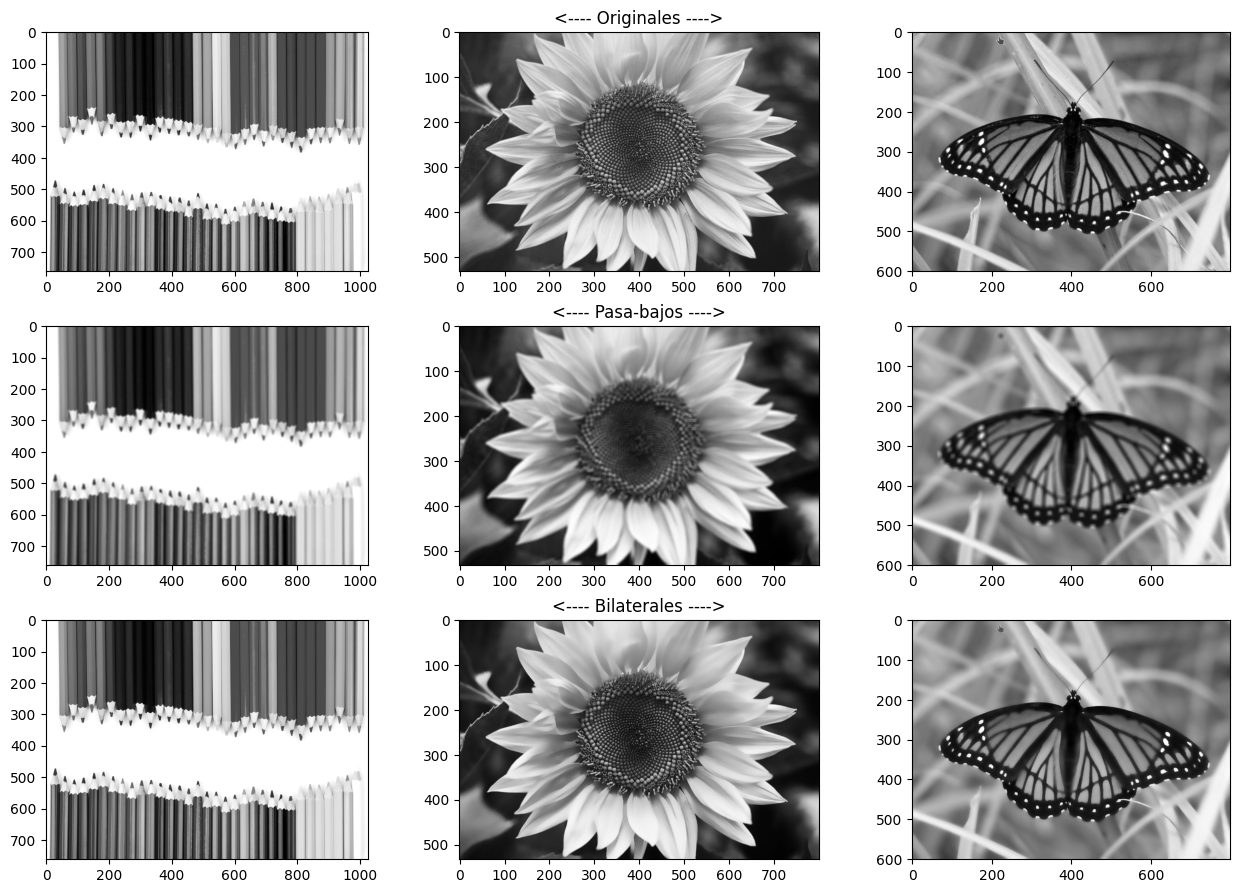

In [ ]:
# Cargamos las imágenes:
lapices02 = cv.imread("/content/drive/My Drive/PDI/lapices02.jpg", cv.IMREAD_GRAYSCALE)
flores02 = cv.imread("/content/drive/My Drive/PDI/flores02.jpg", cv.IMREAD_GRAYSCALE)
mariposa02 = cv.imread("/content/drive/My Drive/PDI/mariposa02.png", cv.IMREAD_GRAYSCALE)

# PASA-BAJOS:
lapices_PB = cv.boxFilter(lapices02, -1, (7,7))   # kernel va a depender de la imagen, vamos probando hasta que se vaya el ruido (viendo perfil del próximo inciso es más fácil ver si saqué bien el ruido que a ojo)
flores_PB = cv.boxFilter(flores02, -1, (7,7))
mariposa_PB = cv.boxFilter(mariposa02, -1, (11,11))  # un re bardo sacar el ruido del cuerpito de la mariposa

# BILATERAL:
lapices_BL = cv.bilateralFilter(lapices02, 15, 10, 10)  # jugamos con los parámetros para ver cómo va mejor, cambia
flores_BL = cv.bilateralFilter(flores02, 15, 15, 15)
mariposa_BL = cv.bilateralFilter(mariposa02, 15, 50, 50)  # acá queda un lujo

# Graficamos resultados:
fig,ax = plt.subplots(3,3,figsize=(13,9))

ax[0,0].imshow(lapices02,cmap='gray')
ax[1,0].imshow(lapices_PB,cmap='gray')
ax[2,0].imshow(lapices_BL,cmap='gray')

ax[0,1].imshow(flores02,cmap='gray')
ax[0,1].set_title('<---- Originales ---->') # esto es para guiarse viendo el gráfico, queda en el medio de cada fila el título
ax[1,1].imshow(flores_PB,cmap='gray')
ax[1,1].set_title('<---- Pasa-bajos ---->')
ax[2,1].imshow(flores_BL,cmap='gray')
ax[2,1].set_title('<---- Bilaterales ---->')

ax[0,2].imshow(mariposa02,cmap='gray')
ax[1,2].imshow(mariposa_PB,cmap='gray')
ax[2,2].imshow(mariposa_BL,cmap='gray')

plt.tight_layout()
plt.show()

> Ambos filtros se encargan de reducir el ruido y suavizar la imágen, pero el bilateral puede mantener los bordes y los detalles finos mejor que un pasa-bajo. En el ejemplo de la mariposa es donde más lo podemos ver.

> Si elegimos un kernel muy grande para el pasa-bajo, saco más el ruido pero también suavizo más y pierdo bordes. Si es muy bajo, no suaviza y por ende no saca el ruido. Por ejemplo, si pongo (3,3) de kernel size, no está tan borroso pero tampoco le saqué el ruido (ver cuerpo de la mariposa).

> El bilateral va a poder deshacerse del ruido y suavizar sin perder tan fácilmente la definición de los bordes. Cuidado porque igualmente si le aumentamos mucho los parámetros vamos a ver que se empieza a ver borroso y pierde esa definición, y si los parámetros son muy chicos no estamos sacando el ruido porque no suaviza nada. Es pertinente elegir los parámetros adecuados para nuestra imágen.

Utilice la función implementada en la guía anterior para visualizar perfiles de grises, eligiendo la misma fila o columna para la imagen original y las que han sido filtradas. Compare los resultados visualizándolos simultáneamente.


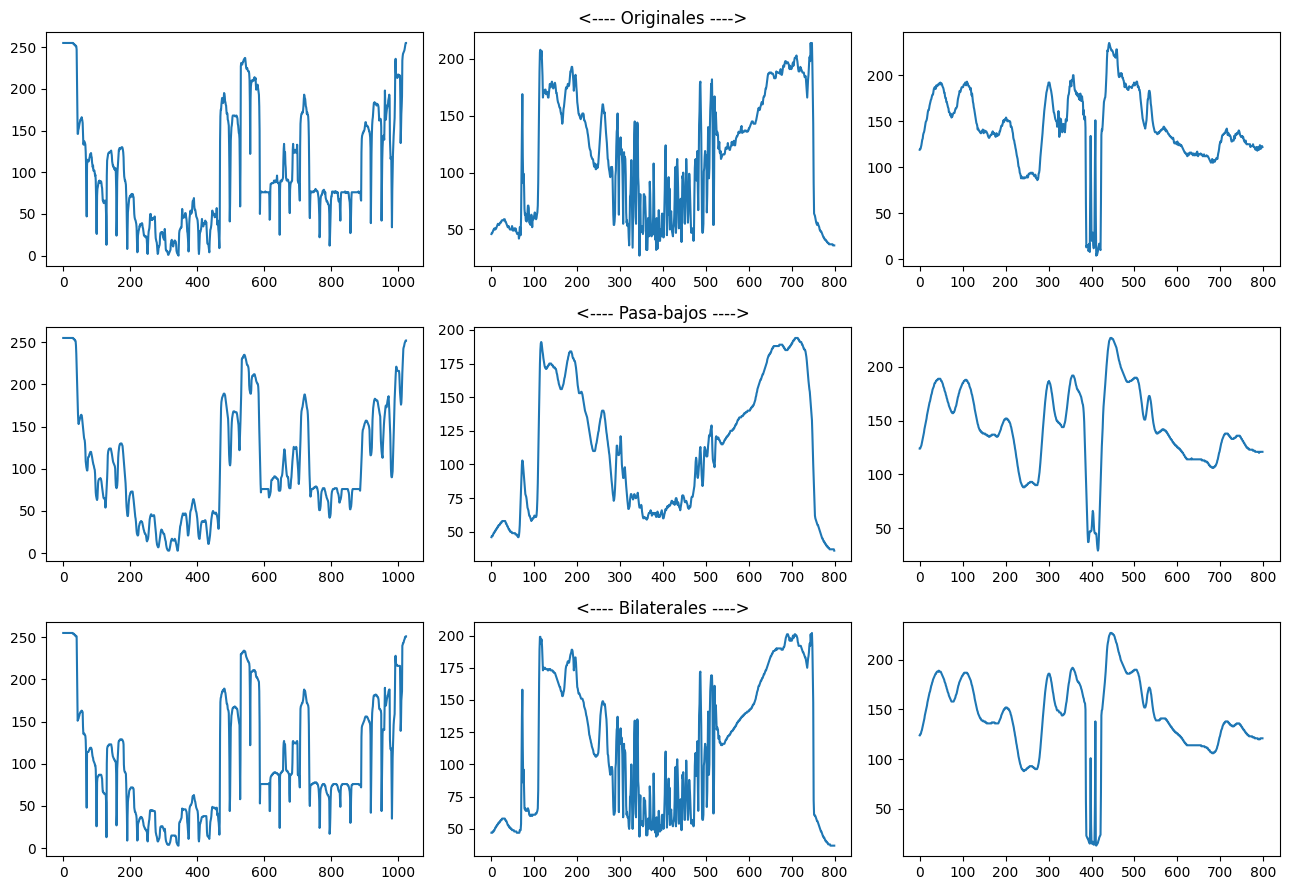

In [ ]:
# Obtengo perfiles:
fila = 200

perfil_lapices = lapices02[fila,:]
perfil_lapices_PB = lapices_PB[fila,:]
perfil_lapices_BL = lapices_BL[fila,:]

perfil_flores = flores02[fila,:]
perfil_flores_PB = flores_PB[fila,:]
perfil_flores_BL = flores_BL[fila,:]

perfil_mariposa = mariposa02[fila,:]
perfil_mariposa_PB = mariposa_PB[fila,:]
perfil_mariposa_BL = mariposa_BL[fila,:]

# Graficamos resultados:
fig,ax = plt.subplots(3,3,figsize=(13,9))

ax[0,0].plot(perfil_lapices)
ax[1,0].plot(perfil_lapices_PB)
ax[2,0].plot(perfil_lapices_BL)

ax[0,1].plot(perfil_flores)
ax[0,1].set_title('<---- Originales ---->') # esto es para guiarse viendo el gráfico, queda en el medio de cada fila el título
ax[1,1].plot(perfil_flores_PB)
ax[1,1].set_title('<---- Pasa-bajos ---->')
ax[2,1].plot(perfil_flores_BL)
ax[2,1].set_title('<---- Bilaterales ---->')

ax[0,2].plot(perfil_mariposa)
ax[1,2].plot(perfil_mariposa_PB)
ax[2,2].plot(perfil_mariposa_BL)

plt.tight_layout()
plt.show()

> Para el caso de los lápices (columna 1) se ve más reducido el ruido (los artefactos más que nada en los picos del gráfico) en el filtrado bilateral.

> La flor (columna 2) muestra como el bilateral logra mantener la distribución de los distintos niveles de grises. Por otro lado, si miramos el pasabajo, si bien el ruido se ve disminuido por la falta de artefactos en la curva, por ejemplo, en y = 700, vemos que suavizó la transición de un valor de gris a otro. Esto en el bilatearl no sucedió.

> Por último, en el caso de la mariposa (columna 3) vemos algo muy similar. En y = 400 vemos como el filtro pasa-bajos suavizó la transición de esos valores de grises, mientras que el bilateral mantuvo los picos que se observan en el perfil de la imagen original. En ambos, sin embargo, perdemos los artefactos de la curva para tener una más suave.